In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
# %matplotlib notebook for interactivity
import utility_functions_sep2018 as bous

station='YBBN' # change to explore fog plots for other locations

In [2]:
# if you need to reload module after making updates to utility_functions_sep2018.py module
import imp
imp.reload(bous)

<module 'utility_functions_sep2018' from '/mnt/shared/stats-R/flask_projects/avguide/utility_functions_sep2018.py'>

In [3]:
fg_aut = bous.get_fog_data_vins(station=station,auto_obs='Yes')
print(f'My fog data for period {fg_aut.index[0].strftime("%d/%b/%Y")} to \
{fg_aut.index[-1].strftime("%d/%b/%Y")}\n\
About {fg_aut.shape[0]} days fog data.\n\
Out of this, about {fg_aut["fogflag"].value_counts()[1]} days had fog.')
print(fg_aut["fogflag"].value_counts())
fg_aut.loc[fg_aut['fogflag']].shape

Getting fog data for YBBN derived using VINS auto obs matching
My fog data for period 01/Jan/2000 to 28/Mar/2020
About 7307 days fog data.
Out of this, about 173 days had fog.
False    7134
True      173
Name: fogflag, dtype: int64


(173, 46)

In [4]:
fg_aut.columns
# fg_aut.info()
fg_aut.head()#.loc[fg_aut['fogflag']].head()

,avID,man,aut,rain24hr,fogflag,min_vis,fg_onset,fg_finish,fg_duration,wind5,...,RH17,QNH17,pptn17,wind20,T20,Td20,RH20,QNH20,pptn20,rain_flag
2000-01-01,YBBN,0,0,0.0,False,10000.0,NaN,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2000-01-01,YBBN,0,0,0.0,False,10000.0,NaN,NaN,NaN,110/12,...,85.0,,0.0,200/05,19.4,17.0,86.0,,0.0,False
2000-01-02,YBBN,0,0,0.0,False,10000.0,NaN,NaN,NaN,120/13,...,82.0,,0.0,180/06,20.8,17.0,79.0,,0.0,False
2000-01-03,YBBN,0,0,0.0,False,10000.0,NaN,NaN,NaN,090/11,...,85.0,,0.0,210/05,20.4,18.0,86.0,,0.0,False
2000-01-04,YBBN,0,0,0.0,False,10000.0,NaN,NaN,NaN,020/13,...,93.0,,0.0,000/00,21.2,19.8,92.0,,0.0,False


In [5]:
# check for missing data
print(fg_aut.shape)
fg_aut.isnull().sum()

(7307, 46)


avID              0
man               0
aut               0
rain24hr         84
fogflag           0
min_vis           0
fg_onset       7134
fg_finish      7134
fg_duration    7134
wind5             0
T5               41
Td5              43
RH5              41
QNH5             80
pptn5            41
wind8            25
T8               25
Td8              28
RH8              25
QNH8             63
pptn8            25
wind11           12
T11              12
Td11             12
RH11             12
QNH11            49
pptn11           12
wind14           21
T14              21
Td14             21
RH14             21
QNH14            58
pptn14           21
wind17           25
T17              25
Td17             25
RH17             25
QNH17            25
pptn17           25
wind20           37
T20              37
Td20             37
RH20             37
QNH20            37
pptn20           37
rain_flag         0
dtype: int64

In [6]:
# https://github.com/pandas-dev/pandas/issues/27310
# fg_aut[['fg_onset','fg_finish','fg_duration']].fillna(value=0,inplace=True)
fg_aut['fg_onset'].fillna(value=0,inplace=True)
fg_aut['fg_finish'].fillna(value=0,inplace=True)
fg_aut['fg_duration'].fillna(value=0,inplace=True)
fg_aut.head()

,avID,man,aut,rain24hr,fogflag,min_vis,fg_onset,fg_finish,fg_duration,wind5,...,RH17,QNH17,pptn17,wind20,T20,Td20,RH20,QNH20,pptn20,rain_flag
2000-01-01,YBBN,0,0,0.0,False,10000.0,0.0,0.0,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2000-01-01,YBBN,0,0,0.0,False,10000.0,0.0,0.0,0.0,110/12,...,85.0,,0.0,200/05,19.4,17.0,86.0,,0.0,False
2000-01-02,YBBN,0,0,0.0,False,10000.0,0.0,0.0,0.0,120/13,...,82.0,,0.0,180/06,20.8,17.0,79.0,,0.0,False
2000-01-03,YBBN,0,0,0.0,False,10000.0,0.0,0.0,0.0,090/11,...,85.0,,0.0,210/05,20.4,18.0,86.0,,0.0,False
2000-01-04,YBBN,0,0,0.0,False,10000.0,0.0,0.0,0.0,020/13,...,93.0,,0.0,000/00,21.2,19.8,92.0,,0.0,False


In [7]:
# fg_aut.columns.values - ['fg_onset','fg_finish','fg_duration']
# fg_aut.columns.to_list() -['fg_onset','fg_finish','fg_duration']
# drop rows with mising data - exclude columns named fg%
# otherwise we end up dropping almost all the data
print(fg_aut.dropna().shape)
# we want to check Nan only for columns that don't include fog stats
#print(fg_aut.dropna(subset=[fg_aut.columns.str.contains("^fg.")]).shape)

fg_aut.loc[:,(fg_aut.columns.str.contains("^fg."))].shape
print(fg_aut.loc[:,~(fg_aut.columns.str.contains("^fg."))].dropna().shape)

(7039, 46)
(7039, 43)


In [8]:

### Some other feature engineered (new explanatory) variables

numeric_cols = [ 'T5', 'Td5', 'RH5', 'QNH5','pptn5',\
                 'T8', 'Td8', 'RH8', 'QNH8','pptn8',\
                 'T11', 'Td11', 'RH11', 'QNH11','pptn11',\
                 'T14', 'Td14', 'RH14', 'QNH14','pptn14',\
                 'T17', 'Td17', 'RH17', 'QNH17','pptn17',\
                 'T20', 'Td20', 'RH20', 'QNH20','pptn20',\
                 'rain24hr', 'min_vis',]
                
               
fg_aut[numeric_cols] = fg_aut[numeric_cols].apply(pd.to_numeric, errors='coerce')


# Derive dewpoint depression 
'''
def dewpoint_seperation(t,td):
    return (t-td)

fg_aut['TmTd5']=fg_aut[['T5','Td5']].apply(dewpoint_seperation)  # apply usually slower
'''

fg_aut['TmTd5']=fg_aut['T5']-fg_aut['Td5']  
fg_aut['TmTd8']=fg_aut['T8']-fg_aut['Td8']
fg_aut['TmTd11']=fg_aut['T11']-fg_aut['Td11']
fg_aut['TmTd14']=fg_aut['T14']-fg_aut['Td14']
fg_aut['TmTd17']=fg_aut['T17']-fg_aut['Td17']
fg_aut['TmTd20']=fg_aut['T20']-fg_aut['Td20']
''' diurnal Td and Td Sep trends '''

fg_aut['Td5_24hr']=fg_aut['Td5'].diff(periods=1) # 24hr trend Td 3pm
fg_aut['Td5_48hr']=fg_aut['Td5'].diff(periods=2) # 48hr trend Td 3pm
fg_aut['TmTd5_24hr']=fg_aut['TmTd5'].diff(periods=1) # 24hr trend Td Sep 3pm
fg_aut['TmTd5_48hr']=fg_aut['TmTd5'].diff(periods=2) # 48hr trend Td Sep 3pm 


fg_aut['Td8_24hr']=fg_aut['Td8'].diff(periods=1) # 24hr trend Td 6pm
fg_aut['Td8_48hr']=fg_aut['Td8'].diff(periods=2) # 48hr trend Td 6pm
fg_aut['TmTd8_24hr']=fg_aut['TmTd8'].diff(periods=1) # 24hr trend Td Sep 6pm 
fg_aut['TmTd8_48hr']=fg_aut['TmTd8'].diff(periods=2) # 24hr trend Td Sep 6pm


fg_aut['Td11_24hr']=fg_aut['Td11'].diff(periods=1) # 24hr trend Td 9pm
fg_aut['Td11_48hr']=fg_aut['Td11'].diff(periods=2) # 48hr trend Td 9pm
fg_aut['TmTd11_24hr']=fg_aut['TmTd11'].diff(periods=1) # 24hr trend Td Sep 9pm 
fg_aut['TmTd11_48hr']=fg_aut['TmTd11'].diff(periods=2) # 24hr trend Td Sep 9pm


fg_aut['Td14_24hr']=fg_aut['Td14'].diff(periods=1) # 24hr trend Td 12am
fg_aut['Td14_48hr']=fg_aut['Td14'].diff(periods=2) # 48hr trend Td 12am
fg_aut['TmTd14_24hr']=fg_aut['TmTd14'].diff(periods=1) # 24hr trend Td Sep 12am 
fg_aut['TmTd14_48hr']=fg_aut['TmTd14'].diff(periods=2) # 24hr trend Td Sep 12am

''' sub diurnal Td trends '''

fg_aut['Td5to8']=fg_aut['Td8']-fg_aut['Td5']   # Td trend from 3pm to 6pm
fg_aut['Td5to11']=fg_aut['Td11']-fg_aut['Td5'] # 3pm to 9pm
fg_aut['Td5to14']=fg_aut['Td14']-fg_aut['Td5'] # 3pm to 12am
fg_aut['Td5to17']=fg_aut['Td17']-fg_aut['Td5'] # 3pm to 3am

fg_aut['Td8to11']=fg_aut['Td11']-fg_aut['Td8'] # Td trend from 6pm to 9pm
fg_aut['Td8to14']=fg_aut['Td14']-fg_aut['Td8'] # 6pm to 12am
fg_aut['Td8to17']=fg_aut['Td17']-fg_aut['Td8'] # 6pm to 3am

fg_aut['Td11to14']=fg_aut['Td14']-fg_aut['Td11'] # Td trend from 9pm to 12am
fg_aut['Td11to17']=fg_aut['Td17']-fg_aut['Td11'] # 9pm to 3am

fg_aut['Td14to17']=fg_aut['Td17']-fg_aut['Td14']  # Td trend from 12am to 3am


td_trends = ['Td5to8','Td5to11','Td5to14','Td5to17','Td8to11','Td8to14',\
           'Td11to14','Td11to17','Td14to17',\
           'Td5_24hr','Td8_24hr','Td11_24hr','Td14_24hr',\
           'Td5_48hr','Td8_48hr','Td11_48hr','Td14_48hr']

tmtd_trends = ['TmTd5','TmTd8','TmTd11','TmTd14','TmTd17',\
           'TmTd5_24hr','TmTd8_24hr','TmTd11_24hr','TmTd14_24hr',\
           'TmTd5_48hr','TmTd8_48hr','TmTd11_48hr','TmTd14_48hr']

td_cols = td_trends+tmtd_trends

''' sub diurnal Td trends - boolean True/False'''

fg_aut['TmTd_trend_5to8'] = \
    (fg_aut['Td5']>13)   & (fg_aut['Td8']>15)  & \
    (fg_aut['TmTd5']<9)  & (fg_aut['TmTd8']<3) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5'])  

fg_aut['TmTd_trend_5to11'] = \
    (fg_aut['Td5']>13)   & (fg_aut['Td8']>15)   & (fg_aut['Td11']>14) & \
    (fg_aut['TmTd5']<9)  & (fg_aut['TmTd8']<3) & (fg_aut['TmTd11']<2) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5'])  

fg_aut['TmTd_trend_5to14'] = \
    (fg_aut['Td5']>13)   & (fg_aut['Td8']>15)   & (fg_aut['Td11']>14) & (fg_aut['Td14']>13) & \
    (fg_aut['TmTd5']<9)  & (fg_aut['TmTd8']<3) & (fg_aut['TmTd11']<2) & (fg_aut['TmTd14']<1) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5']) 

fg_aut['TmTd_trend_8to11'] = \
    (fg_aut['Td8']>15)   & (fg_aut['Td11']>14) & \
    (fg_aut['TmTd8']<3) & (fg_aut['TmTd11']<2) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8'])

fg_aut['TmTd_trend_8to14'] = \
    (fg_aut['Td8']>15)   & (fg_aut['Td11']>14) & (fg_aut['Td14']>13) & \
    (fg_aut['TmTd8']<3) & (fg_aut['TmTd11']<2) & (fg_aut['TmTd14']<1) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) 

fg_aut['TmTd_trend_11to14'] = \
    (fg_aut['Td11']>14) & (fg_aut['Td14']>13) & \
    (fg_aut['TmTd11']<2) & (fg_aut['TmTd14']<1) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) 


fg_aut['TmTdOnly_trend_5to14'] = \
    (fg_aut['TmTd5']<9)  & (fg_aut['TmTd8']<3) & (fg_aut['TmTd11']<2) & (fg_aut['TmTd14']<1) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5']) 

td_bool_cols = ['TmTd_trend_5to8','TmTd_trend_5to11','TmTd_trend_5to14',\
               'TmTd_trend_8to11','TmTd_trend_8to14','TmTd_trend_11to14','TmTdOnly_trend_5to14']

# rolling mean rainfall to date : weekkly/monthly
fg_aut['avg_wkly_rain'] = fg_aut.loc[:,'rain24hr'].rolling(window=7).mean()   # 7 day rolling mean
fg_aut['avg_mthly_rain'] = fg_aut.loc[:,'rain24hr'].rolling(window=30).mean() # 30 day rolling mean
# fg_aut.resample('M')['rain24hr'].mean() thats average monthly rainfall - we dont want this !

# Pressure/QNH trends
fg_aut['QNH5_24hr']=fg_aut['QNH5'].diff(periods=1)  # 24r trend QNH @3pm
fg_aut['QNH5_48hr']=fg_aut['QNH5'].diff(periods=2)  # 48hr  trend QNH @3pm

qnh_rain_cols = ['QNH5_24hr','QNH5_48hr','avg_wkly_rain','avg_mthly_rain']

# and split winds into speed/direction
fg_aut[['wdir5','wspd5']]=fg_aut['wind5'].str.split('/',expand = True)
fg_aut[['wdir8','wspd8']]=fg_aut['wind8'].str.split('/',expand = True)
fg_aut[['wdir11','wspd11']]=fg_aut['wind11'].str.split('/',expand = True)
fg_aut[['wdir14','wspd14']]=fg_aut['wind14'].str.split('/',expand = True)
fg_aut[['wdir17','wspd17']]=fg_aut['wind17'].str.split('/',expand = True)
fg_aut[['wdir20','wspd20']]=fg_aut['wind20'].str.split('/',expand = True)
wind_cols = ['wdir5','wspd5','wdir8','wspd8','wdir11','wspd11','wdir14','wspd14',\
             'wdir17','wspd17','wdir20','wspd20']

fg_aut[wind_cols+td_cols+qnh_rain_cols] = fg_aut[wind_cols+td_cols+qnh_rain_cols].\
                            apply(pd.to_numeric, errors='coerce')

# carefull using dropna - it drops all rows wih 'fogflag'==False!!!
# we only loose about 10 fog 173 to 162 now, and about 103 non fog days - not bad
print(fg_aut.shape)
fg_aut.dropna(axis='rows', how='any', subset=wind_cols+td_cols+qnh_rain_cols).shape
#fg_aut['fogflag'].value_counts()

(7307, 101)


(5248, 101)

In [9]:
fg_aut['TmTd_trend_5to14']= (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
                            (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
                            (fg_aut['TmTd8']<fg_aut['TmTd5'])  & \
                (fg_aut['TmTd14']<2) & (fg_aut['TmTd11']<3)
fg_aut['TmTd_trend_5to14'].value_counts()

False    6195
True     1112
Name: TmTd_trend_5to14, dtype: int64

In [10]:
# of about 1000 days that have the right (decreasing) TmTd trend , 122 lead to fog with 956 false leads
fg_aut.loc[fg_aut['TmTd_trend_5to14'],'fogflag'].value_counts()

False    986
True     126
Name: fogflag, dtype: int64

In [51]:
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to14'],
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

print(f'\nOut of {cross.loc["All",True]} days when TmTd_trend_5to14 may suggest fog is possible,\n\
tp={tp} days or about {tp/cross.loc["All",True]*100:.0f}% of the days actually get fog.')

print(f'\nCorrectly identified {tp  /cross.loc[True,"All"]* 100:.0f}% of the fog cases' )
print(f'Correctly identified {tn /cross.loc[False,"All"]*100:.0f}% of no fog days' )

print(f'\nOverall Accuracy Rate: {(tn+tp)/(tn+tp+fp+fn)*100:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {(fp+fn)/(tn+tp+fp+fn)*100:.0f}%  (wrong fog and no fog predictions)')
cross


Out of 1112 days when TmTd_trend_5to14 may suggest fog is possible,
tp=126 days or about 11% of the days actually get fog.

Correctly identified 73% of the fog cases
Correctly identified 86% of no fog days

Overall Accuracy Rate: 86% (includes correct no fog predictions as well!)
Misclassification Rate: 14%  (wrong fog and no fog predictions)


TmTd_trend_5to14,False,True,All
fogflag,,,
False,6148,986,7134
True,47,126,173
All,6195,1112,7307


In [11]:
'''Now grab climate zone data file for station '''
#from utility_functions_sep2018 import process_climate_zone_csv_2020
#from utility_functions_sep2018 import get_sounding_data
#from utility_functions_sep2018 import get_climatological_fog_probability

# df = bous.process_climate_zone_csv_2020('app/data/HM01X_Data_040842.txt')

import pickle
import os
station=station
df  = pickle.load(
                open(
                os.path.join('app','data', station+'_aws.pkl'), 'rb'))

# filter 1800Z - actually 3am/1700z data so between_time('16:50','17:10')
print(f'Number of days in dataset: {pd.date_range(start=df.index[0],end=df.index[-1],freq="D").shape[0]},From start_date={df.index[0]} to end_date={df.index[-1]}')


Number of days in dataset: 7569,From start_date=2000-01-01 00:00:00 to end_date=2020-09-20 18:30:00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372074 entries, 2000-01-01 00:00:00 to 2020-09-20 18:30:00
Data columns (total 42 columns):
AvID            372074 non-null object
M_type          372074 non-null object
pptn10min       371719 non-null float64
pptnSince9      368817 non-null float64
T               372006 non-null float64
Td              371993 non-null float64
RH              371993 non-null float64
WS              372035 non-null float64
WDir            372022 non-null float64
MaxGust10min    369550 non-null float64
QNH             370234 non-null float64
CL1_amnt        263180 non-null float64
CL1_ht          263118 non-null float64
CL2_amnt        149751 non-null float64
CL2_ht          149750 non-null float64
CL3_amnt        56033 non-null float64
CL3_ht          56033 non-null float64
Ceil1_amnt      372074 non-null object
Ceil1_ht        161406 non-null float64
Ceil2_amnt      372074 non-null object
Ceil2_ht        88399 non-null float64
Ceil3_amnt      372074

In [13]:
# extract data for 12am, 3am, 5am  also merge in fogflag for those days
# note fog flag is for calendar days starting 00Z or actually 0200 UTC 
# e.g Fog flag for Wed 11th Nov is actually for fog that occurs
# anytime from 0000Z/0200Z Wed 11th to 2330Z Wed 11th (actuall allow upto 0200Z Thu 12th !!)
# so no problem merging with aws data as that also for UTC date starting 00 UTC 11th to 00Z Thu 12th

'''
7394 days
between_time('16:50','17:10') - 7445 rows - too many (resample('D') fix!)
between_time('16:55','17:05') - 7381 about 15 less days
between_time('16:59','17:01') - 7358 about 44 fewer days
'''
dat11 = df[['WDir','WS','T','Td','RH','pptnSince9','vis','vis_aws','PW','QNH',
   'Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']]\
.between_time('10:50','11:10').resample('D').first().loc[df.index[0]:df.index[-1]]
dat11 = pd.merge(left=dat11,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')

dat14 = df[['WDir','WS','T','Td','RH','pptnSince9','vis','vis_aws','PW','QNH',
   'Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']]\
.between_time('13:50','14:10').resample('D').first().loc[df.index[0]:df.index[-1]]
dat14 = pd.merge(left=dat14,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')

dat17 = df[['WDir','WS','T','Td','RH','pptnSince9','vis','vis_aws','PW','QNH',
   'Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']]\
.between_time('16:50','17:10').resample('D').first().loc[df.index[0]:df.index[-1]]
dat17 = pd.merge(left=dat17,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')

dat23 = df[['WDir','WS','T','Td','RH','pptnSince9','vis','vis_aws','PW','QNH',
   'Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']]\
.between_time('22:50','23:10').resample('D').first().loc[df.index[0]:df.index[-1]]
dat23 = pd.merge(left=dat23,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')

dat05 = df[['WDir','WS','T','Td','RH','pptnSince9','vis','vis_aws','PW','QNH',
   'Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']]\
.between_time('04:50','05:10').resample('D').first().loc[df.index[0]:df.index[-1]]
dat05 = pd.merge(left=dat05,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')

In [14]:
dat11.index

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-02', '2000-01-03',
               '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-08', '2000-01-09',
               ...
               '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14',
               '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18',
               '2020-09-19', '2020-09-20'],
              dtype='datetime64[ns]', length=7570, freq=None)

In [15]:
fg_aut.index

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-02', '2000-01-03',
               '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-08', '2000-01-09',
               ...
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28'],
              dtype='datetime64[ns]', length=7307, freq=None)

In [16]:
# get fog dates for YBBN and add flag in 1700Z aws data file
# fg_dates = bous.get_fog_data_vins(station = 'YBBN',get_dates_only='Yes')
# fg_dates.shape,fg_dates[0],fg_dates[-1]
# add fog flag column in 1800Z aws data
'''
Note that while this method of getting fog flag works sometimes - its a very silly idea!!
dat17['any_fg'] = dat17.index.isin(fg_aut.index)
dat17['any_fg'].value_counts()  # True 7034 False 360 !!!!???

# pd.merge is safer
dat14 = pd.merge(left=dat14,right=fg_aut[['fogflag']],
                 left_index=True, right_index=True, how='left')
dat17 = pd.merge(left=dat17,right=fg_aut[['fogflag']],
                 left_index=True, right_index=True, how='left')
dat23 = pd.merge(left=dat23,right=fg_aut[['fogflag']],
                 left_index=True, right_index=True, how='left')
'''
dat17['fogflag'].value_counts()

False    7134
True      173
Name: fogflag, dtype: int64

In [17]:
station='YBBN' # change to explore fog plots for other locations
cur_dir='/home/bou/shared/stats-R/flask_projects/avguide'
import os
time='1700'
os.path.join(cur_dir,'app','data',station+'_sonde_'+time+'_aws.pkl')

'/home/bou/shared/stats-R/flask_projects/avguide/app/data/YBBN_sonde_1700_aws.pkl'

In [18]:
# Now merge with sonde 900hpa data - to get 23Z sonde pass time='23'
# If we have a new data grab - need to run this script again
# sonde = bous.batch_process_F160_hanks(station='YBBN',time='1700')
# otherwise just load pickled sonde file

# sonde = bous.get_sounding_data(station='YBBN',time='17')  obseleted
time='1700'
sonde = pickle.load(
            open(os.path.join(cur_dir,'app','data',station+'_sonde_'+time+'_aws.pkl'), 'rb'))
sonde = sonde.dropna(axis='rows', how='all')
print(f'Sonde data shape {sonde.shape} - from {sonde.index[0]} to {sonde.index[-1]}')

# only keep sonde data for period we have fog dates/data
sonde = sonde.loc[fg_aut.index[0]:fg_aut.index[-1]]
print(f'Sonde data new size/shape {sonde.shape}')

'''To trully be able to capture seasonal variations
    we have to convert calendar day to a categorical variable.
    We can bin months like this '''
    # DJF 'summer',MAM  'autumn', JJA 'winter', SON 'spring'
seasons = {'summer': [12, 1, 2], 'autumn': [3, 4, 5],
               'winter': [6, 7, 8], 'spring': [9, 10, 11]}

sonde['season'] = ''
for k, v in enumerate(seasons):
    # print (v,seasons[v])
    # print(obs.index.month.isin(seasons[v]))
    sonde.loc[sonde.index.month.isin(seasons[v]), 'season'] = v

# get some lapse rates to see association between stability and fog freq
# note sfc_T is actually is lowest level temp data 
# may not be really at surface but okay for most cases

sonde['lr_sfc_850']=sonde['sfc_T'] - sonde['T850']
sonde['lr_850_500']=sonde['T850'] - sonde['T500']
#sonde['mid_rh']=    sonde['T700'] - sonde['Td700']
sonde['mid_rh']=  (
    (sonde['T850'] - sonde['Td850'])+\
    (sonde['T700'] - sonde['Td700'])+\
    (sonde['T500'] - sonde['Td500']))/3
print(sonde.shape)
print(sonde['lr_850_500'].isnull().sum())
print(sonde['lr_sfc_850'].isnull().sum())

# get fogflag into sonde data
# don't as sonde data may be UTC date for sonding times 17Z and 19Z and 23Z
# sonde = pd.merge(left=sonde,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')
# sonde['fogflag']=np.where(sonde["fogflag"] == True, True, False)
sonde17 = sonde
print(sonde17.columns)
sonde17.tail(2)


Sonde data shape (6963, 26) - from 2000-06-05 00:00:00 to 2020-06-08 00:00:00
Sonde data new size/shape (6895, 26)
(6895, 30)
4907
4897
Index(['sfc_P', 'sfc_T', 'sfc_Td', 'sfc_wdir', 'sfc_wspd', 'P910', 'T910',
       'Td910', '900_wdir', '900_WS', 'P850', 'T850', 'Td850', '850_wdir',
       '850_WS', 'P700', 'T700', 'Td700', '700_wdir', '700_WS', 'P500', 'T500',
       'Td500', '500_wdir', '500_WS', 'tmp_rate850_500', 'season',
       'lr_sfc_850', 'lr_850_500', 'mid_rh'],
      dtype='object')


,sfc_P,sfc_T,sfc_Td,sfc_wdir,sfc_wspd,P910,T910,Td910,900_wdir,900_WS,...,P500,T500,Td500,500_wdir,500_WS,tmp_rate850_500,season,lr_sfc_850,lr_850_500,mid_rh
2020-03-27,1018.0,17.8,15.3,220.0,6.2,910.0,NaN,NaN,120.0,25.8,...,500.0,-12.7,-19.7,245.0,7.2,25.7,autumn,4.8,25.7,4.866667
2020-03-28,1017.0,19.4,18.7,205.0,7.2,910.0,NaN,NaN,90.0,5.2,...,500.0,-11.1,-34.1,260.0,15.4,23.1,autumn,7.4,23.1,9.400000


In [19]:
# Now merge with sonde 900hpa data - to get 23Z sonde pass time='23'
# sonde = bous.get_sounding_data(station='YBBN',time='23')   obseleted

time='2300'
sonde = pickle.load(
            open(os.path.join(cur_dir,'app','data',station+'_sonde_'+time+'_aws.pkl'), 'rb'))
sonde.dropna(axis='rows', how='all',inplace=True)

print(f'Sonde data shape {sonde.shape} - from {sonde.index[0]} to {sonde.index[-1]}')

# only keep sonde data for period we have fog dates/data
sonde = sonde.loc[fg_aut.index[0]:fg_aut.index[-1]]
print(f'Sonde data new size/shape {sonde.shape}')

'''To trully be able to capture seasonal variations
    we have to convert calendar day to a categorical variable.
    We can bin months like this '''
    # DJF 'summer',MAM  'autumn', JJA 'winter', SON 'spring'
seasons = {'summer': [12, 1, 2], 'autumn': [3, 4, 5],
               'winter': [6, 7, 8], 'spring': [9, 10, 11]}

sonde['season'] = ''
for k, v in enumerate(seasons):
    # print (v,seasons[v])
    # print(obs.index.month.isin(seasons[v]))
    sonde.loc[sonde.index.month.isin(seasons[v]), 'season'] = v

# get some lapse rates to see association between stability and fog freq
# note sfc_T is actually is lowest level temp data 
# may not be really at surface but okay for most cases

sonde['lr_sfc_850']=sonde['sfc_T'] - sonde['T850']
sonde['lr_850_500']=sonde['T850'] - sonde['T500']
#sonde['mid_rh']=    sonde['T700'] - sonde['Td700']
sonde['mid_rh']=  (
    (sonde['T850'] - sonde['Td850'])+\
    (sonde['T700'] - sonde['Td700'])+\
    (sonde['T500'] - sonde['Td500']))/3
print(sonde.shape)
print(sonde['lr_850_500'].isnull().sum())
print(sonde['lr_sfc_850'].isnull().sum())

# get fogflag into sonde data
# don't as sonde data may be UTC date for sonding times 17Z and 19Z and 23Z
# sonde = pd.merge(left=sonde,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')
# sonde['fogflag']=np.where(sonde["fogflag"] == True, True, False)
sonde23 = sonde
print(sonde23.columns)
sonde23.tail(2)

Sonde data shape (6964, 26) - from 2000-02-05 00:00:00 to 2020-06-07 00:00:00
Sonde data new size/shape (6895, 26)
(6895, 30)
39
19
Index(['sfc_P', 'sfc_T', 'sfc_Td', 'sfc_wdir', 'sfc_wspd', 'P910', 'T910',
       'Td910', '900_wdir', '900_WS', 'P850', 'T850', 'Td850', '850_wdir',
       '850_WS', 'P700', 'T700', 'Td700', '700_wdir', '700_WS', 'P500', 'T500',
       'Td500', '500_wdir', '500_WS', 'tmp_rate850_500', 'season',
       'lr_sfc_850', 'lr_850_500', 'mid_rh'],
      dtype='object')


,sfc_P,sfc_T,sfc_Td,sfc_wdir,sfc_wspd,P910,T910,Td910,900_wdir,900_WS,...,P500,T500,Td500,500_wdir,500_WS,tmp_rate850_500,season,lr_sfc_850,lr_850_500,mid_rh
2020-03-27,1020.0,23.8,16.8,155.0,6.2,910.0,NaN,NaN,95.0,20.6,...,500.0,-12.3,-31.3,335.0,5.2,24.5,autumn,11.6,24.5,8.366667
2020-03-28,1019.0,23.2,19.2,90.0,7.2,910.0,NaN,NaN,95.0,6.2,...,500.0,-11.5,-43.5,265.0,17.4,23.5,autumn,11.2,23.5,12.900000


In [20]:
# merge right (for now) - note this will trim aws data outside first/last fog dates
# but ensures validity/integrity fog flag - also carries fog flag from dat to sonde
# also we bring surface conditions winds, temps etc from aws data not from sonde
# merge sonde into aws data - this will trim aws data outside first/last fog dates
# but ensures validity/integrity fog flag - also carries fog flag from dat to sonde
# also we bring surface conditions winds, temps etc from aws data not from sonde

# # for some reason after merge - fogflag stops being boolean - fix it

aws14_sonde17 = pd.merge(
    left=dat14, 
    right=sonde17[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')
aws14_sonde17['fogflag']=np.where(aws14_sonde17["fogflag"] == True, True, False)


aws17_sonde17 = pd.merge(
    left=dat17, 
    right=sonde17[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')
aws17_sonde17['fogflag']=np.where(aws17_sonde17["fogflag"] == True, True, False)


aws17_sonde23 = pd.merge(
    left=dat17, 
    right=sonde23[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')
aws17_sonde23['fogflag']=np.where(aws17_sonde23["fogflag"] == True, True, False)

aws23_sonde23 = pd.merge(
    left=dat23, 
    right=sonde23[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')
aws23_sonde23['fogflag']=np.where(aws23_sonde23["fogflag"] == True, True, False)

aws23_sonde23.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6895 entries, 2000-02-05 to 2020-03-28
Data columns (total 25 columns):
WDir          6854 non-null float64
WS            6854 non-null float64
T             6853 non-null float64
Td            6853 non-null float64
RH            6853 non-null float64
pptnSince9    6779 non-null float64
vis           6843 non-null float64
vis_aws       6693 non-null float64
PW            481 non-null float64
QNH           6842 non-null float64
Ceil1_ht      3025 non-null float64
Ceil1_amnt    6854 non-null object
Ceil2_ht      1557 non-null float64
Ceil2_amnt    6854 non-null object
Ceil3_ht      839 non-null float64
Ceil3_amnt    6854 non-null object
fogflag       6895 non-null bool
900_wdir      6683 non-null float64
900_WS        6683 non-null float64
850_wdir      6625 non-null float64
850_WS        6625 non-null float64
season        6895 non-null object
lr_850_500    6856 non-null float64
lr_sfc_850    6876 non-null float64
mid_rh        6851 n

In [21]:
aws14_sonde17 = pd.merge(
    left=dat14, 
    right=sonde17[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')

aws14_sonde17 = pd.merge(
    left=dat14, 
    right=sonde17[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')
aws14_sonde17['fogflag']=np.where(aws14_sonde17["fogflag"] == True, True, False)




aws14_sonde23 = pd.merge(
    left=dat14, 
    right=sonde23[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')


aws17_sonde23 = pd.merge(
    left=dat17, 
    right=sonde23[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')


# ```  To generate aws_sonde_daily using 23Z sonde need to get new sonde data 1st aws_sonde_daily = pd.merge(
#     left=dat_1700, 
#     right=sonde[['900_wdir', '900_WS','850_wdir', '850_WS',\
#                  'season', 'lr_850_500','lr_sfc_850']],
#     left_index=True, right_index=True, how='right')

In [22]:
# we trying to build prediction using 3pm observations and 23Z sonde 
# get 05Z AWS data
dat05 = df[['WDir','WS','T','Td','RH','pptnSince9','QNH']]\
.between_time('04:45','05:15').resample('D').first().loc[df.index[0]:df.index[-1]]
print('\n',dat05.isna().sum())

# merge with fog data to get fog outcome for the day
dat05 = pd.merge(left=dat05,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')
print('\nNo NaN in response fogflag before merge',fg_aut[['fogflag']].isna().sum())

print('\n',dat05.isna().sum())  # 700 Nan - must be 700 extra days in aws data at 05Z for which 
# fog data was not available
# although thios says data asme period
dat05.index[0],dat05.index[-1], fg_aut.index[0],fg_aut.index[-1]

print('\n',dat05['fogflag'].unique())
print('\n',dat05['fogflag'].value_counts())

dat05.dropna(subset=['fogflag'], inplace=True)
print('\n',dat05['fogflag'].unique())
print('\n',dat05['fogflag'].value_counts())

print('\n',dat05.isna().sum())


 WDir           75
WS             75
T              76
Td             76
RH             76
pptnSince9    134
QNH           113
dtype: int64

No NaN in response fogflag before merge fogflag    0
dtype: int64

 WDir           75
WS             75
T              76
Td             76
RH             76
pptnSince9    134
QNH           114
fogflag       263
dtype: int64

 [False nan True]

 False    7134
True      173
Name: fogflag, dtype: int64

 [False True]

 False    7134
True      173
Name: fogflag, dtype: int64

 WDir           50
WS             50
T              51
Td             51
RH             51
pptnSince9    105
QNH            88
fogflag         0
dtype: int64


In [23]:
# note that fog predictions can be done two ways
# lets say its 00Z now (or 04Z or 05Z) and we would like to estimate fog potential for next day
# we can use forecast sonde data i.e +1700Z or +2300Z model sonde data
# merge that with cur_days 00Z, 02Z or 05Z aws data (for sfc T,Td,, QNH etc) 

# how do we get forecast 23Z sonde in verification studies like this 
# we just use next morning 23Z sonde since we have sonde for all days
# this is like a perfect prog method and we use this dataset for pattern matching
# so merge 05Z T,Td,QNH, winds etc and 23Z sonde 900 winds - find all matching and see fog fractions
# for matching days

aws05_sonde23_nextday = pd.merge(
    left=dat05, 
    right=sonde23[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')

print(aws05_sonde23_nextday['fogflag'].unique())  # [False True]  no Nans now!
print(aws05_sonde23_nextday['fogflag'].value_counts())


aws05_sonde23_nextday.dropna(subset=['fogflag'], inplace=True)  # Drop Nans in response fogflag
aws05_sonde23_nextday['fogflag']=aws05_sonde23_nextday['fogflag'].astype(bool) # force response bool


print(aws05_sonde23_nextday['fogflag'].unique())  # [False True]  no Nans now!
print(aws05_sonde23_nextday['fogflag'].value_counts())

aws_sonde_daily =  aws05_sonde23_nextday

print(aws_sonde_daily['fogflag'].value_counts())
aws_sonde_daily.dropna(subset=['fogflag'], inplace=True)
print(aws_sonde_daily['fogflag'].value_counts())
aws_sonde_daily['fogflag'] = aws_sonde_daily['fogflag'].astype(bool)

aws_sonde_daily['fogflag'].value_counts()

[False True nan]
False    6657
True      160
Name: fogflag, dtype: int64
[False  True]
False    6657
True      160
Name: fogflag, dtype: int64
False    6657
True      160
Name: fogflag, dtype: int64
False    6657
True      160
Name: fogflag, dtype: int64


False    6657
True      160
Name: fogflag, dtype: int64

In [24]:
# another way is use cur_days 0200 or 0500Z data and latest (past) sonde
# 23Z sonde is about 3 to 6 hours old at 05Z when doing 06Z TAF 
# so say its 0200 or 0500Z on Wed 11th Nov, we use THIS mornings 23Z sonde
# which would be dated/stamped Tue 10th Nov 2300 (Note UTC date 10th, but calendar date 11th) 
# Merging works on index - so cols from two frames joined on matching dates 
# so we would need to reindex our sonde data so that Tue 10th Nov data gets index/or date Wed 11th Nov !!!
# i.e we need to increment each of the index/dates by one day - then merge would get effect/data we want

# to test this approach we need to 

sonde23_sameday = sonde23.set_index(sonde23.index + pd.Timedelta(str(1) + ' days'))
aws05_sonde23_sameday = pd.merge(
    left=dat05, 
    right=sonde23_sameday[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')

print(aws05_sonde23_sameday['fogflag'].unique())  # [False True]  no Nans now!
print(aws05_sonde23_sameday['fogflag'].value_counts())


aws05_sonde23_sameday.dropna(subset=['fogflag'], inplace=True) # Drop Nans in response fogflag
aws05_sonde23_sameday['fogflag']=aws05_sonde23_sameday['fogflag'].astype(bool) # force response bool


print(aws05_sonde23_sameday['fogflag'].unique())  # [False True]  no Nans now!
print(aws05_sonde23_sameday['fogflag'].value_counts())

aws_sonde_daily =  aws05_sonde23_sameday

print(aws_sonde_daily['fogflag'].value_counts())
aws_sonde_daily.dropna(subset=['fogflag'], inplace=True)
print(aws_sonde_daily['fogflag'].value_counts())
aws_sonde_daily['fogflag'] = aws_sonde_daily['fogflag'].astype(bool)

aws_sonde_daily['fogflag'].value_counts()

[False nan True]
False    6659
True      161
Name: fogflag, dtype: int64
[False  True]
False    6659
True      161
Name: fogflag, dtype: int64
False    6659
True      161
Name: fogflag, dtype: int64
False    6659
True      161
Name: fogflag, dtype: int64


False    6659
True      161
Name: fogflag, dtype: int64

In [25]:
aws_sonde_daily['TmTd5']=aws_sonde_daily['T']-aws_sonde_daily['Td']
aws_sonde_daily['Td5_48hr']=aws_sonde_daily['Td'].diff(periods=2) # 48hr trend Td 3pm
aws_sonde_daily['TmTd5_48hr']=aws_sonde_daily['TmTd5'].diff(periods=2) # 48hr trend Td Sep 3pm
aws_sonde_daily['QNH5_48hr']=aws_sonde_daily['QNH'].diff(periods=2)  # 48hr trend QNH @ 3pm
aws_sonde_daily['sea_breeze']= (aws_sonde_daily['WDir'] > 350 ) | (aws_sonde_daily['WDir'] < 90)
# increasing Td  AND lowering QNH
aws_sonde_daily['Td_QNH'] = (aws_sonde_daily['Td5_48hr'] > 0) & (aws_sonde_daily['QNH5_48hr']<0)
# if 900 winds from favourable sector (note negation)
aws_sonde_daily['900_env'] =~(aws_sonde_daily['900_wdir'] > 60) & (aws_sonde_daily['900_wdir'] <180)
aws_sonde_daily.tail()

,WDir,WS,T,Td,RH,pptnSince9,QNH,fogflag,900_wdir,900_WS,...,lr_850_500,lr_sfc_850,mid_rh,TmTd5,Td5_48hr,TmTd5_48hr,QNH5_48hr,sea_breeze,Td_QNH,900_env
2020-03-24,110.0,8.9,22.6,18.6,78.0,0.0,1020.2,False,105.0,16.4,...,19.7,11.0,11.433333,4.0,-0.8,-4.8,4.1,False,False,False
2020-03-25,70.0,7.0,25.7,16.0,55.0,0.0,1018.2,False,90.0,16.4,...,20.9,11.4,8.633333,9.7,-2.9,1.6,-0.3,True,False,False
2020-03-26,100.0,8.9,26.6,17.5,57.0,0.0,1018.5,False,115.0,8.2,...,22.3,13.6,20.666667,9.1,-1.1,5.1,-1.7,False,False,False
2020-03-27,170.0,11.1,23.0,17.9,73.0,0.0,1019.7,False,150.0,13.4,...,21.7,13.0,8.866667,5.1,1.9,-4.6,1.5,False,False,False
2020-03-28,120.0,8.9,25.7,18.6,65.0,0.0,1017.5,False,95.0,20.6,...,24.5,11.6,8.366667,7.1,1.1,-2.0,-1.0,False,True,False


In [26]:
# grab 5Z/3pm observations from Brissy AWS data file
# we trying to build prediction using 3pm observations and 23Z sonde 
# get 05Z AWS data
dat05 = df[['WDir','WS','T','Td','RH','QNH']]\
.between_time('04:45','05:15').resample('D').first().loc[df.index[0]:df.index[-1]]

# merge with fog data to grab fog outcome and other engineered variables for each day

fg_aut['QNH5_48hr']=fg_aut['QNH5'].diff(periods=2)  # 48hr trend QNH @ 3pm

dat05 = pd.merge(left=dat05,
                 right=fg_aut[['fogflag','TmTd5','Td5_24hr','TmTd5_48hr','QNH5_48hr',
                               'TmTdOnly_trend_5to14','avg_wkly_rain']],
                 left_index=True, right_index=True, how='left')

dat05.dropna(subset=['fogflag'], inplace=True)  # drop nans in response


# merge with sonde from 23Z earlier on same day
sonde23_sameday = sonde23.set_index(sonde23.index + pd.Timedelta(str(1) + ' days'))
aws05_sonde23_sameday = pd.merge(
    left=dat05, 
    right=sonde23_sameday[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')

aws05_sonde23_sameday.dropna(subset=['fogflag'], inplace=True) # Drop Nans in response fogflag

aws05_sonde23_sameday['fogflag']=aws05_sonde23_sameday['fogflag'].astype(bool) # force response bool


aws_sonde_daily =  aws05_sonde23_sameday

# whether we had NE seabreeze at 5Z
aws_sonde_daily['sea_breeze']= (aws_sonde_daily['WDir'] > 350 ) | (aws_sonde_daily['WDir'] < 90)

# if 900 winds from favourable sector (note negation)
aws_sonde_daily['900_env'] =~(aws_sonde_daily['900_wdir'] > 60) & (aws_sonde_daily['900_wdir'] <180)


aws_sonde_daily.dropna(subset=['fogflag'], inplace=True)

aws_sonde_daily['fogflag'].value_counts()

False    6659
True      161
Name: fogflag, dtype: int64

In [27]:
aws_sonde_daily['season'].value_counts()

autumn    1734
winter    1701
spring    1700
summer    1685
Name: season, dtype: int64

In [28]:
aws_sonde_daily.columns

Index(['WDir', 'WS', 'T', 'Td', 'RH', 'QNH', 'fogflag', 'TmTd5', 'Td5_24hr',
       'TmTd5_48hr', 'QNH5_48hr', 'TmTdOnly_trend_5to14', 'avg_wkly_rain',
       '900_wdir', '900_WS', '850_wdir', '850_WS', 'season', 'lr_850_500',
       'lr_sfc_850', 'mid_rh', 'sea_breeze', '900_env'],
      dtype='object')

In [29]:
'''
aws_sonde_daily = aws_sonde_daily[['fogflag','Td', 'TmTd5', 'Td5_48hr', 'TmTd5_48hr','QNH', \
                                   '900_wdir', 'avg_wkly_rain','lr_sfc_850','mid_rh','QNH5_48hr',\
                                   'sea_breeze','Td_QNH', '900_env','season']]
'''
aws_sonde_daily.tail()

,WDir,WS,T,Td,RH,QNH,fogflag,TmTd5,Td5_24hr,TmTd5_48hr,...,900_wdir,900_WS,850_wdir,850_WS,season,lr_850_500,lr_sfc_850,mid_rh,sea_breeze,900_env
2020-03-24,110.0,8.9,22.6,18.6,78.0,1020.2,False,4.0,-0.3,-4.8,...,105.0,16.4,100.0,11.4,autumn,19.7,11.0,11.433333,False,False
2020-03-25,70.0,7.0,25.7,16.0,55.0,1018.2,False,9.7,-2.6,1.6,...,90.0,16.4,105.0,7.2,autumn,20.9,11.4,8.633333,True,False
2020-03-26,100.0,8.9,26.6,17.5,57.0,1018.5,False,9.1,1.5,5.1,...,115.0,8.2,80.0,9.2,autumn,22.3,13.6,20.666667,False,False
2020-03-27,170.0,11.1,23.0,17.9,73.0,1019.7,False,5.1,0.4,-4.6,...,150.0,13.4,125.0,17.4,autumn,21.7,13.0,8.866667,False,False
2020-03-28,120.0,8.9,25.7,18.6,65.0,1017.5,False,7.1,0.7,-2.0,...,95.0,20.6,110.0,13.4,autumn,24.5,11.6,8.366667,False,False


In [30]:
aws_sonde_daily.isnull().sum()

WDir                     45
WS                       45
T                        46
Td                       46
RH                       46
QNH                      58
fogflag                   0
TmTd5                    37
Td5_24hr                 73
TmTd5_48hr               75
QNH5_48hr                78
TmTdOnly_trend_5to14      0
avg_wkly_rain           473
900_wdir                205
900_WS                  205
850_wdir                262
850_WS                  262
season                    0
lr_850_500               39
lr_sfc_850               19
mid_rh                   44
sea_breeze                0
900_env                   0
dtype: int64

In [31]:
aws_sonde_daily['fogflag'].value_counts()

False    6659
True      161
Name: fogflag, dtype: int64

In [32]:
# replace rainfall missing/NaNs with 0
aws_sonde_daily['avg_wkly_rain'].fillna(value=0,inplace=True)
aws=aws_sonde_daily.dropna(subset=['Td', 'TmTd5','QNH','Td5_24hr','TmTd5_48hr','QNH5_48hr'],thresh=6)
aws['fogflag'].value_counts()

False    6511
True      158
Name: fogflag, dtype: int64

In [33]:
aws.isnull().sum()

WDir                      1
WS                        1
T                         0
Td                        0
RH                        0
QNH                       0
fogflag                   0
TmTd5                     0
Td5_24hr                  0
TmTd5_48hr                0
QNH5_48hr                 0
TmTdOnly_trend_5to14      0
avg_wkly_rain             0
900_wdir                197
900_WS                  197
850_wdir                252
850_WS                  252
season                    0
lr_850_500               39
lr_sfc_850               19
mid_rh                   44
sea_breeze                0
900_env                   0
dtype: int64

In [34]:
# we loose about 24 fog days by getting rid of nulls in gradient wind and lapse rate
aws=aws.dropna(subset=['WDir','WS','900_wdir', '850_wdir','lr_sfc_850','mid_rh'],thresh=6)
print(aws['fogflag'].value_counts())
aws.isnull().sum()   # No nulls - good - but we lost 26 fog days !!!

False    6210
True      143
Name: fogflag, dtype: int64


WDir                    0
WS                      0
T                       0
Td                      0
RH                      0
QNH                     0
fogflag                 0
TmTd5                   0
Td5_24hr                0
TmTd5_48hr              0
QNH5_48hr               0
TmTdOnly_trend_5to14    0
avg_wkly_rain           0
900_wdir                0
900_WS                  0
850_wdir                0
850_WS                  0
season                  0
lr_850_500              0
lr_sfc_850              0
mid_rh                  0
sea_breeze              0
900_env                 0
dtype: int64

In [35]:
cols = ['fogflag',  'Td',  'avg_wkly_rain',
       '900_wdir', 'season', 'lr_sfc_850',
       'mid_rh', 'TmTd5', 'Td5_24hr', 'TmTd5_48hr', 'QNH5_48hr', 'TmTdOnly_trend_5to14','sea_breeze',
       '900_env']

# droped 900 and 850 wind speed, also surface wdir and ws, 850_dir, T, QNH, RH
aws=aws[cols]

In [36]:
#need to convert categorical season to numeric
# shortcut way
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
class_le.fit_transform(aws['season'].values)

array([2, 2, 2, ..., 0, 0, 0])

In [37]:
'''will leave categorical encoding for now esp. given get_dummiers creates so many new columns
   for season - we have 4 categories and it ends up creating 4 columns for seasons!!
 
   We will try Decision Trees and Random Forest Algorithms now 
   for these feature scaling is also not required so makes things bit easier
'''

# manual encoding - use dict for mapping categorical lables to numeric values
print(np.unique(aws['season']))
class_mapping = {label:idx for idx,label in enumerate(np.unique(aws['season'])) }
print(class_mapping)
# now use mapping dictionary to transform the class labels into integers
'''
Note the class labels are not ordinal  
so winter (3) is no more larger or important than autumn (0) 
Ordinal features are also categorical but have an order and thus can be sorted or ordered 
in this case feature 'season' is nominal - no order of importance
'''
season_mapping = {label:idx for idx,label in enumerate(np.unique(aws['season'])) }
TF_map = {True:1,False:0}
aws_copy = aws.copy()
aws['season']=aws['season'].map(season_mapping)
aws['sea_breeze']=aws['sea_breeze'].map(TF_map)
# aws['Td_QNH']=aws['Td_QNH'].map(TF_map)
aws['900_env']=aws['900_env'].map(TF_map)
aws['fogflag']=aws['fogflag'].map(TF_map)
aws.tail()

['autumn' 'spring' 'summer' 'winter']
{'autumn': 0, 'spring': 1, 'summer': 2, 'winter': 3}


,fogflag,Td,avg_wkly_rain,900_wdir,season,lr_sfc_850,mid_rh,TmTd5,Td5_24hr,TmTd5_48hr,QNH5_48hr,TmTdOnly_trend_5to14,sea_breeze,900_env
2020-03-24,0,18.6,0.000000,105.0,0,11.0,11.433333,4.0,-0.3,-4.8,4.1,False,0,0
2020-03-25,0,16.0,0.000000,90.0,0,11.4,8.633333,9.7,-2.6,1.6,-0.3,False,1,0
2020-03-26,0,17.5,0.000000,115.0,0,13.6,20.666667,9.1,1.5,5.1,-1.7,False,0,0
2020-03-27,0,17.9,1.057143,150.0,0,13.0,8.866667,5.1,0.4,-4.6,1.5,False,0,0
2020-03-28,0,18.6,1.057143,95.0,0,11.6,8.366667,7.1,0.7,-2.0,-1.0,False,0,0


In [38]:
#https://www.peterbe.com/plog/how-to-pad-fill-string-by-variable-python
'''
Suppose you have a string mystr that you want to fill with with spaces so it's 10 characters wide:

>>> mystr = 'peter'
>>> mystr.ljust(10)
'peter     '
>>> mystr.rjust(10)
'     peter'

with "f-strings" you do:
>>> width = 10
>>> f'{mystr:<{width}}'
'peter     '
>>> f'{mystr:>{width}}'
'     peter'

how do you make the filler something other than ' '. 

>> width = 10      # how much padding
>>> filler = '*'   # char to use for padding
>>> f'{"peter":{filler}<{width}}'
'peter*****'
'''

'\nSuppose you have a string mystr that you want to fill with with spaces so it\'s 10 characters wide:\n\n>>> mystr = \'peter\'\n>>> mystr.ljust(10)\n\'peter     \'\n>>> mystr.rjust(10)\n\'     peter\'\n\nwith "f-strings" you do:\n>>> width = 10\n>>> f\'{mystr:<{width}}\'\n\'peter     \'\n>>> f\'{mystr:>{width}}\'\n\'     peter\'\n\nhow do you make the filler something other than \' \'. \n\n>> width = 10      # how much padding\n>>> filler = \'*\'   # char to use for padding\n>>> f\'{"peter":{filler}<{width}}\'\n\'peter*****\'\n'

In [39]:
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a list of feature names
feat_labels = aws.columns[1:]  #exclude target (1st) label

# Create X - feature matrix from the features
X=aws[aws.columns[1:]]  #exclude target (1st) column 

# Create y array of target labels 
y=aws[aws.columns[0]]  #prediction/target  column

# Split the data into 25% test and 75% training
X_train,X_test,y_train,y_test=\
train_test_split(X,y,test_size=0.25,random_state=5,shuffle=True,stratify=None)


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000,
                               random_state=0,
                               n_jobs=-1)
# Train the classifier
clf.fit(X_train,y_train)

# Print the name and gini importance of each feature
importances=clf.feature_importances_
indices=np.argsort(importances)[::-1]
# for feature in zip(feat_labels, clf.feature_importances_):
for i in range(X_train.shape[1]):
    print(f"{i+1:2d})      {feat_labels[indices[i]]:{' '}<{15}} {importances[indices[i]]:.3f}")


 1)      TmTdOnly_trend_5to14 0.128
 2)      mid_rh          0.102
 3)      900_wdir        0.101
 4)      QNH5_48hr       0.097
 5)      lr_sfc_850      0.096
 6)      TmTd5           0.094
 7)      TmTd5_48hr      0.087
 8)      Td5_24hr        0.084
 9)      Td              0.084
10)      avg_wkly_rain   0.074
11)      season          0.031
12)      sea_breeze      0.014
13)      900_env         0.008


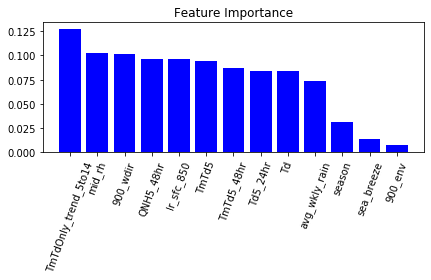

In [40]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color='blue',
       align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices],rotation=70)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [41]:
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/

# Identify And Select Most Important Features
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.1

from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.10)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,

In [42]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

900_wdir
mid_rh
TmTdOnly_trend_5to14


In [43]:
# Create A Data Subset With Only The Most Important Features
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
print(X_important_train.shape) # note only 7 columns in train set
X_important_train[0,:]

(4764, 3)


array([160.0, 23.400000000000002, False], dtype=object)

In [44]:
# Train A New Random Forest Classifier Using Only Most Important Features
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
# Compare The Accuracy Of Our Full Feature Classifier To Our Limited Feature Classifier
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
print(accuracy_score(y_test, y_pred))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
'''
 our original model which contained all 13 features is 97% accurate while 
 our ‘limited’ model which contained only 7 i.e almost half as many features is 97% accurate as well
 
 for no loss in accuracy we halved the number of features in the model!!!!!
 
 Note our accuracy is quite high given huge massive class imbalance 97 to 98% data is no fog events!!
 
'''
accuracy_score(y_test, y_important_pred)

0.9760855884203902


0.9729389553178099

In [46]:
'''
One Hot encoding FIX

A learning algorithm would assume winter (3) is larger than autumn (0)
and class lable True (1) is larger than False (0) even though this assumption is incorrect

'''
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(categorical_features=[14])
#ohe.fit_transform(aws).toarray()
print(pd.get_dummies(aws_copy, columns=['sea_breeze', '900_env','season']).columns)
aws_copy=pd.get_dummies(aws_copy, columns=['sea_breeze', '900_env','season'])

Index(['fogflag', 'Td', 'avg_wkly_rain', '900_wdir', 'lr_sfc_850', 'mid_rh',
       'TmTd5', 'Td5_24hr', 'TmTd5_48hr', 'QNH5_48hr', 'TmTdOnly_trend_5to14',
       'sea_breeze_False', 'sea_breeze_True', '900_env_False', '900_env_True',
       'season_autumn', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')


In [47]:
from sklearn.model_selection import train_test_split
X=aws_copy[aws_copy.columns[1:]]  #exclude prediction column
y=aws_copy[aws_copy.columns[0]]  #prediction column

X_train,X_test,y_train,y_test=\
train_test_split(X,y,test_size=0.25,random_state=5,shuffle=True,stratify=None)


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feat_labels = aws_copy.columns[1:]  #exclude prediction label
forest = RandomForestClassifier(n_estimators=1000,
                               random_state=0,
                               n_jobs=-1)
forest.fit(X_train,y_train)
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
for i in range(X_train.shape[1]):
    print(f"{i+1:2d})      {feat_labels[indices[i]]:{' '}<{15}} {importances[indices[i]]:.3f}")


 1)      TmTdOnly_trend_5to14 0.126
 2)      900_wdir        0.100
 3)      mid_rh          0.099
 4)      lr_sfc_850      0.095
 5)      QNH5_48hr       0.093
 6)      TmTd5           0.092
 7)      TmTd5_48hr      0.086
 8)      Td5_24hr        0.082
 9)      Td              0.080
10)      avg_wkly_rain   0.070
11)      season_winter   0.015
12)      season_spring   0.012
13)      season_autumn   0.011
14)      sea_breeze_False 0.010
15)      sea_breeze_True 0.010
16)      season_summer   0.006
17)      900_env_True    0.006
18)      900_env_False   0.006


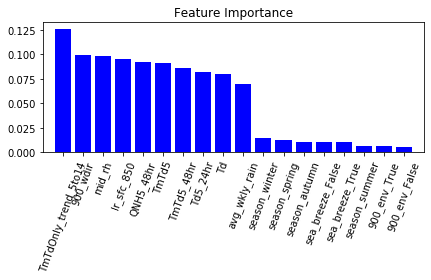

In [48]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color='blue',
       align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices],rotation=70)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

Further Info on One Hot Encoding and why it may not be appropriate for converting your categorical data to numeric


# One-Hot Encoding is making your Tree-Based Ensembles worse, here’s why?

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

## One-Hot-Encoding, Multicollinearity and the Dummy Variable Trap

https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a

## Stop One-Hot Encoding Your Categorical Vari
https://towardsdatascience.com/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809

## When and Why Tree-Based Models (Often) Outperform Neural Networks
https://towardsdatascience.com/when-and-why-tree-based-models-often-outperform-neural-networks-ceba9ecd0fd8

We may also need to scle our data
## Data Scaling for Machine Learning — The Essential Guide
https://towardsdatascience.com/data-scaling-for-machine-learning-the-essential-guide-d6cfda3e3d6b


Dont miss 
## MissForest: The Best Missing Data Imputation Algorithm?
https://towardsdatascience.com/missforest-the-best-missing-data-imputation-algorithm-4d01182aed3

to deal with missing values 

## How-to-deal-with-imbalanced-data

https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb

https://towardsdatascience.com/struggling-with-data-imbalance-semi-supervised-self-supervised-learning-help-4de8b8f23490


https://towardsdatascience.com/tutorial-stop-running-jupyter-notebooks-from-your-command-line-b3af93265230


https://towardsdatascience.com/create-a-professional-dasbhoard-with-dash-and-css-bootstrap-e1829e238fc5

https://stackoverflow.com/questions/7580508/getting-chrome-to-accept-self-signed-localhost-certificate
    
https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0#ceab?source=email-45474866b58d-1606919725416-newsletter.v3-7f60cf5620c9------------------------4d1e2a2d_8af1_402a_97f6_0e5f94c3ae8c--------d6fe9076899



## auto-sklearn

https://towardsdatascience.com/4-python-automl-libraries-every-data-scientist-should-know-680ff5d6ad08

auto-sklearn is an automated machine learning toolkit that integrates seamlessly with the standard sklearn interface so many in the community are familiar with. With the use of recent methods like Bayesian Optimization, the library is built to navigate the space of possible models and learns to infer if a specific configuration will work well on a given task.

Created by Matthias Feurer, et al., the library’s technical details are described in a paper, Efficient and Robust Machine Learning. Feurer writes:

… we introduce a robust new AutoML system based on scikit-learn (using 15 classifiers, 14 feature preprocessing methods, and 4 data preprocessing methods, giving rise to a structured hypothesis space with 110 hyperparameters).
auto-sklearn is perhaps the best library to get started with AutoML. In addition to discovering data preparation and model selections for a dataset, it learns from models that perform well on similar datasets. Top-performing models are aggregated in an ensemble.

In [49]:
import autosklearn as ask

(py37) [bou@bous-fed31 ~]$ pip install auto-sklearn   FAILED !!!!!!!


#ask.regression.AutoSklearnRegressor() for regression tasks
model = ask.classification.AutoSklearnClassifier(
    ensemble_size=10, #size of the end ensemble (minimum is 1)
    time_left_for_this_task=120, #the number of seconds the process runs for
    per_run_time_limit=30) #maximum seconds allocated per model

# Create a list of feature names
feat_labels = aws.columns[1:]  #exclude target (1st) label
# Create X - feature matrix from the features
X=aws[aws.columns[1:]]  #exclude target (1st) column 
# Create y array of target labels 
y=aws[aws.columns[0]]  #prediction/target  column
# Split the data into 25% test and 75% training
X_train,X_test,y_train,y_test=\
train_test_split(X,y,test_size=0.25,random_state=5,shuffle=True,stratify=None)

model.fit(X_train, y_train) #begin fitting the search model
print(model.sprint_statistics()) #print statistics for the search
y_predictions = model.predict(X_test) #get predictions from the model


SyntaxError: invalid syntax (<ipython-input-49-c0fee8d59324>, line 3)